# Netflix Content Analysis

A visual and statistical analysis of the Netflix dataset using Pandas, Matplotlib, and Seaborn.

## 1) Importing Libraries & Loading the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data set
df = pd.read_csv("netflix_titles.csv")

## 2) Basic Dataset Information

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## 3) Data Cleaning and Preprocessing 

### Handling Missing Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
# Fill with "Unknown"
df['director']=df['director'].fillna("Unknown")
df['cast']=df['cast'].fillna("Unknown")
df['country']=df['country'].fillna("Unknown")

In [10]:
# drop rows(if very few)
df.dropna(subset=['date_added'],inplace=True)

In [11]:
# Convert date_added to datetime
"""Note: The `date_added` column had extra spaces, which caused parsing errors.
We stripped whitespace and used `errors='coerce'` to safely convert to datetime."""
df['date_added'] = df['date_added'].str.strip() # Removing extra spaces first to get in a proper format

In [12]:
df['date_added'] = pd.to_datetime(df['date_added'],errors = 'coerce')
# The 'coerce' will convert any non readable data as NaT"

In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [15]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3


In [16]:
# Clean 'duration' Column

'''For movies: duration in minutes
For shows: number of seasons'''
# splitting it into number + type

df[['duration_int','duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_int'] = pd.to_numeric(df['duration_int'],errors = 'coerce')


**Why Are We Splitting the duration Column?**

The duration column in the Netflix dataset contains both numbers and units together, like:

"90 min"

"1 Season"

"2 Seasons"

"45 min"

But for analysis and plotting, we need to separate the number and the unit into two columns:

In [17]:
# Remove Duplicates (if any)
df.drop_duplicates(inplace=True)

## 4) Feature Engineering(Column Engineering)

Column engineering (also called feature engineering) means:

Creating new columns from existing ones to make patterns more visible to you or to your machine learning model.

These new columns are not always necessary (hence optional), but they can greatly enhance your analysis or model performance.

In [18]:
# 1) We have created year and month from the date_added column

In [19]:
# 2) Seperated duration columns

In [20]:
# 3) Content Category flags
# From : type and rating

df['is_movie'] = df['type'] == "Movie"

movies_df = df[df['is_movie']]
shows_df = df[~df['is_movie']]

In [21]:
kid_ratings = ['G', 'PG', 'TV-Y', 'TV-Y7', 'TV-G']
df['is_kid_friendly'] = df['rating'].isin(kid_ratings)

In [22]:
# Country Groups
# From : country

df['is_indian'] = df['country'].str.contains('India' , na=False)
# na=False means: "For any missing value (NaN), treat it as False instead of NaN."|

In [23]:
# Genre Count
# From: listed_in (genre column)

df['num_genres'] = df['listed_in'].str.count(',') + 1

# Why? See if content with more genres is more common or popular

In [24]:
# Has known director/star
# From : director,cast

df['has_director'] = (~df['director'].isna()) & (df['director'] != 'Unknown')
df['has_star'] = (~df['cast'].isna()) & (df['cast'] != 'Unknown')

In [25]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,year_added,month_added,duration_int,duration_type,is_movie,is_kid_friendly,is_indian,num_genres,has_director,has_star
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,...,2021,9,90.0,min,True,False,False,1,True,False
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,2021,9,2.0,Seasons,False,False,False,3,False,True
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,...,2021,9,1.0,Season,False,False,False,3,True,True
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,...,2021,9,1.0,Season,False,False,False,2,False,False
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,2021,9,2.0,Seasons,False,False,True,3,False,True


## 5) Exploratory Data Analysis(EDA)

### 1) Basic Data Understanding

#### i) How many total titles are in the dataset ?

In [26]:
total_titles = len(df)
print(f"Total titles in the dataset: {total_titles}")

Total titles in the dataset: 8797


In [27]:
# Alternative method
total_titles = df.shape[0]
print(f"Total titles in the dataset: {total_titles}")

Total titles in the dataset: 8797


#### ii) How many movies vs TV shows ?

In [28]:
content_counts = df['type'].value_counts()
print(content_counts)
# .value_counts() counts how many times each unique value appears (e.g., how many "Movies" and how many "TV Shows").

type
Movie      6131
TV Show    2666
Name: count, dtype: int64


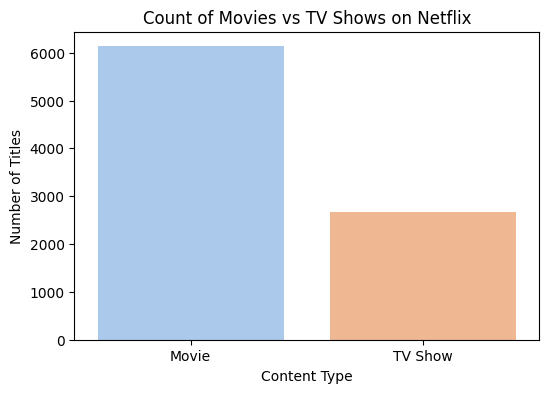

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type',hue='type', palette='pastel')
plt.title('Count of Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.show()

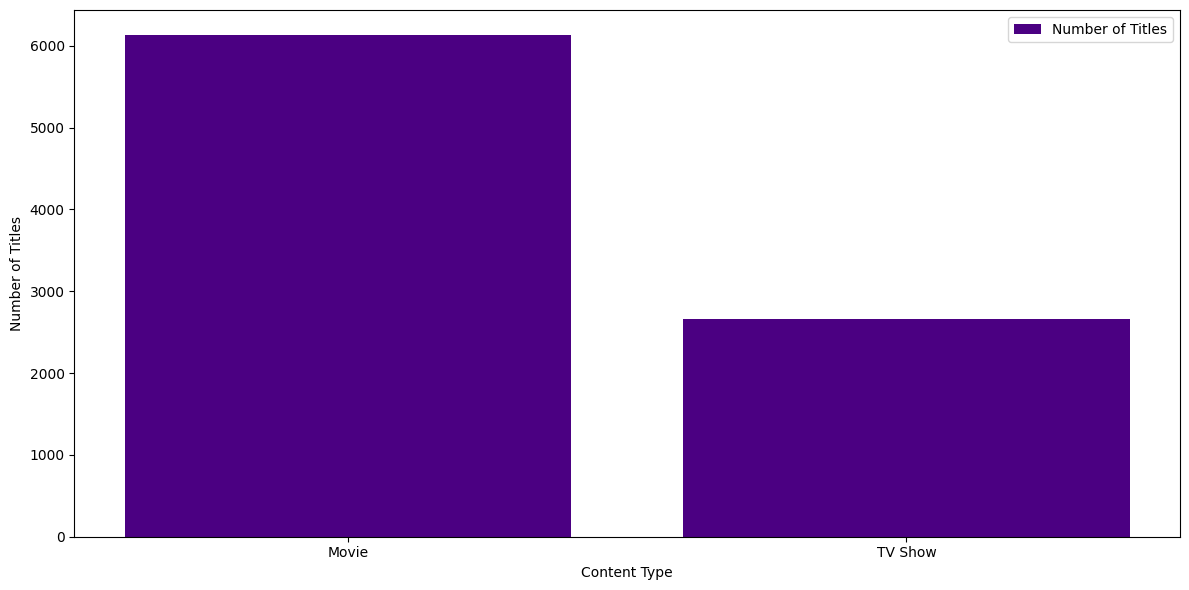

In [30]:
plt.figure(figsize=(12,6))
plt.bar(content_counts.index,content_counts.values,color='indigo',label = 'Number of Titles')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.legend()
plt.tight_layout()
plt.show()

**Key Insights**
* There are more Movies than TV Shows available on Netflix.

* This suggests Netflix’s content library focuses more on films but still has a good collection of TV shows.

* Understanding this balance helps in analyzing viewer preferences and content strategy.

#### iii) How many unique countries produce content ?

In [31]:
unique_countries = df['country'].nunique()
print("No of unique countries : ",unique_countries)
# .nunique() counts how many distinct unique values are in that column.

No of unique countries :  749


In [32]:
top_countries = df['country'].value_counts().head(10)
print(top_countries)
# Filter out 'unknown' countries before counting
country_filtered = df[df['country'] != 'unknown']

country
United States     2812
India              972
Unknown            830
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


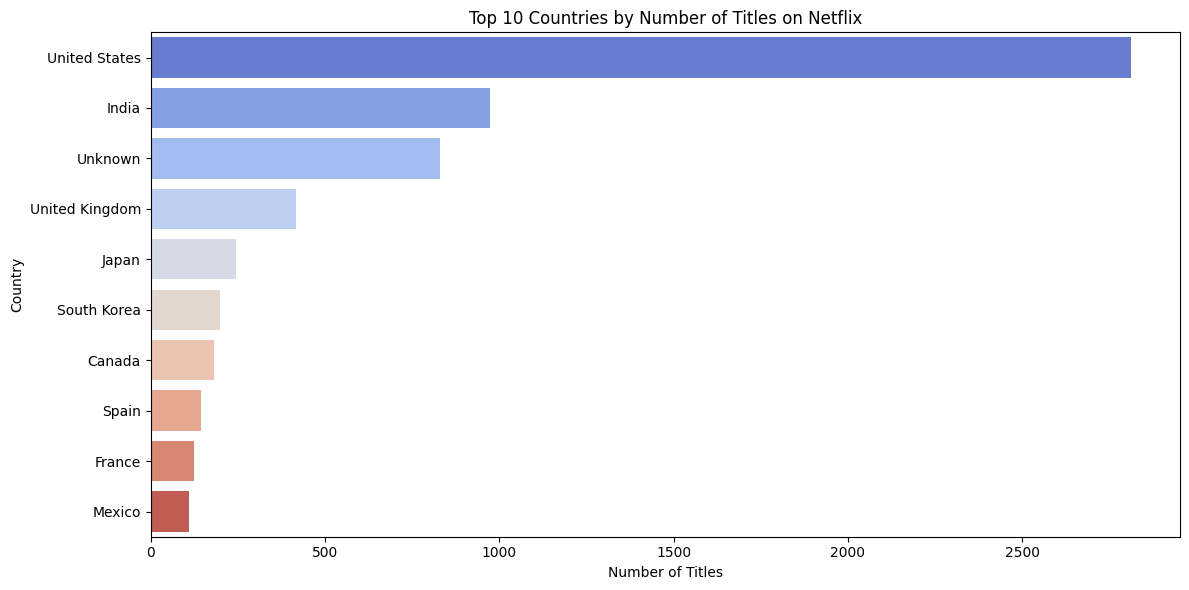

In [33]:
# Visualizing top 10 countries
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index,hue=top_countries.index ,palette='coolwarm')
plt.title('Top 10 Countries by Number of Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

**Key Insights**
  
* Netflix has titles from 10 different countries, showing a wide range of global content.

* The top countries producing the most titles are United States,India (replace with your actual top countries).

* This indicates Netflix’s strong presence and content creation focus in these regions.

* Some countries have very few titles, suggesting potential areas for content expansion.

#### iv) How many unique directors and cast members ?

In [34]:
# Drop NaN's and split by comma, then flatten into a list
directors = (df.loc[df['director'] != 'Unknown' , 'director'] # exclude 'Unknown'
             .str.split(',')    # split by comma
             .explode()         # flatten list to rows
             .str.strip()       # remove spaces
             .unique()
            )
num_unique_directors = len(directors)
print("No of unique directors: ",num_unique_directors)

No of unique directors:  4993


In [35]:
cast_members = (
    df.loc[df['cast'] != 'Unknown', 'cast']          # exclude 'Unknown'
    .str.split(',')
    .explode()
    .str.strip()
    .unique()
)

num_unique_cast = len(cast_members)
print(f"Number of unique cast members: {num_unique_cast}")

Number of unique cast members: 36403


### 2. Time-Based Analysis

#### i) How many titles were added each year ?

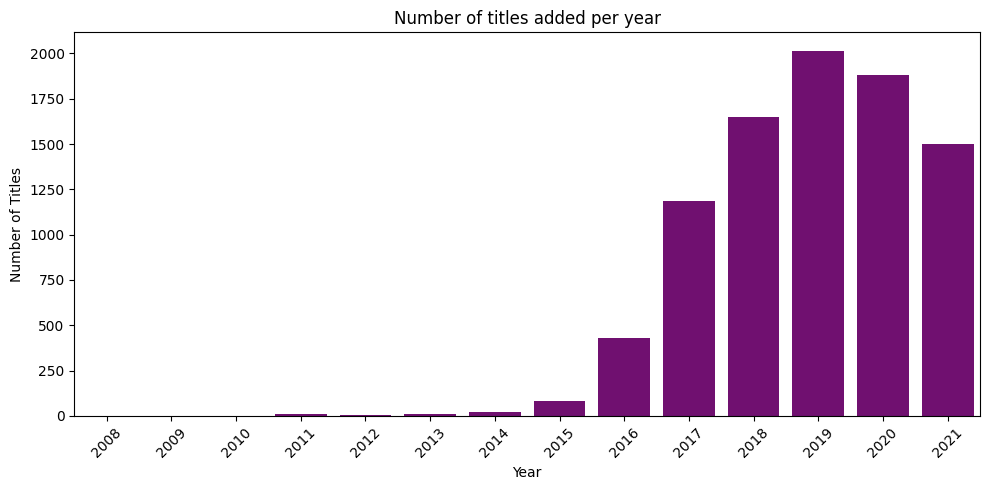

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(df,x = 'year_added',color='purple',order = sorted(df['year_added'].dropna().unique()))
plt.title('Number of titles added per year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# sns.countplot() automatically counts how many times each year appears in the year_added column.
# order=... sorts the years in order instead of randomly.
# dropna() removes missing years (if any), and unique() grabs each unique year.

**Key Insights:**
* The plot illustrates the number of titles added to Netflix each year.

* There is a clear upward trend in content additions from earlier years, peaking in 2019.

* 2019 saw the highest number of titles added to the platform.

* After 2019, there is a noticeable decline, likely influenced by the COVID-19 pandemic affecting production and releases in 202

#### ii) Monthly pattern: When does Netflix add the most content?

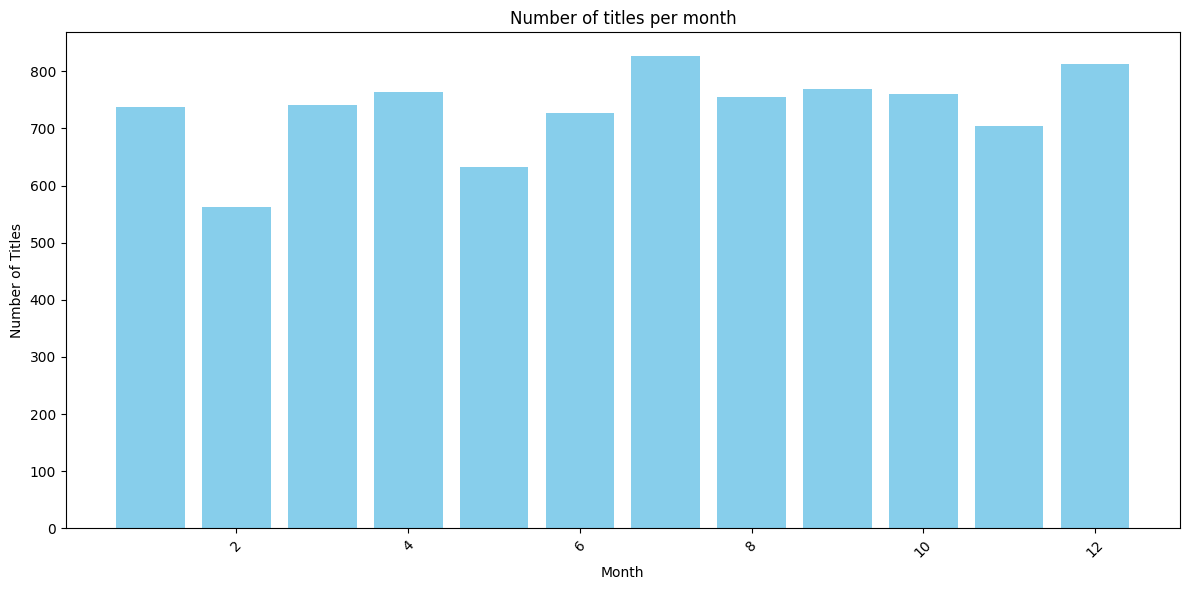

In [37]:
# Using only matplotlib
num_titles_per_month = df['month_added'].value_counts()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(12,6))
plt.bar(num_titles_per_month.index,num_titles_per_month.values,color='skyblue')
plt.title('Number of titles per month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

C:\Users\HASINI\AppData\Local\Temp\ipykernel_24804\2981436572.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.barplot(data=month_df, x='Month', y='Title_Count', hue='Month', palette='Blues_d', legend=False)


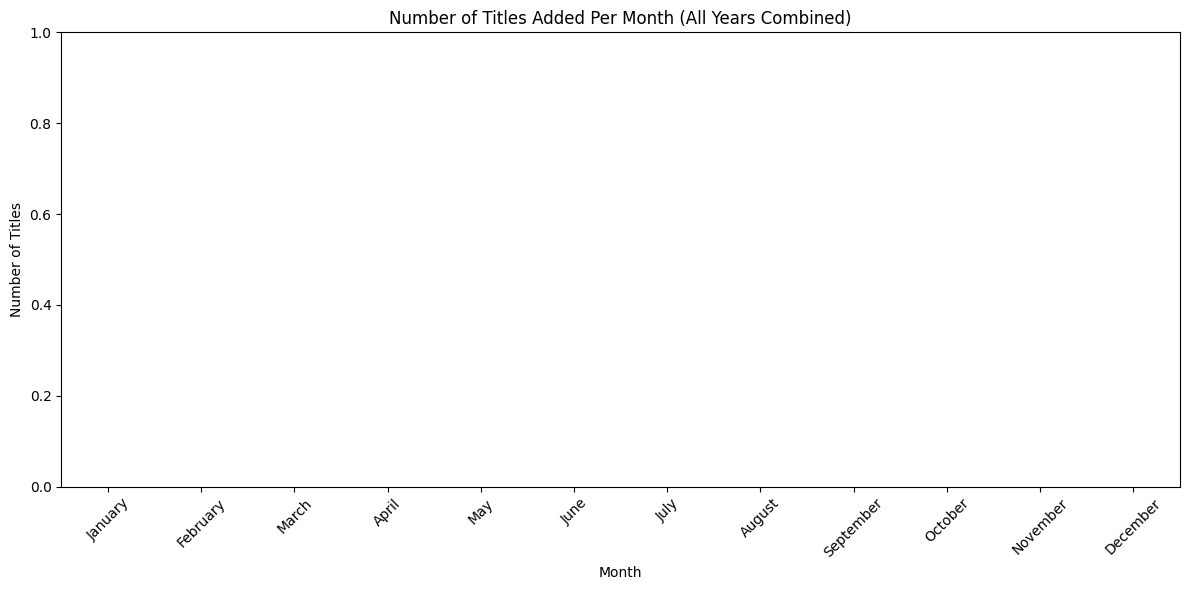

In [38]:
# Using seaborn


# Step 2: Group and count
month_df = df['month_added'].value_counts().reset_index()
month_df.columns = ['Month', 'Title_Count']

# Step 3: Sort according to actual calendar order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
month_df['Month'] = pd.Categorical(month_df['Month'], categories=months_order, ordered=True)
month_df = month_df.sort_values('Month')

# Step 4: Plot
plt.figure(figsize=(12,6))
sns.barplot(data=month_df, x='Month', y='Title_Count', hue='Month', palette='Blues_d', legend=False)
plt.title('Number of Titles Added Per Month (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key Insights**
* The number of titles added fluctuates throughout the year.

* The months June, July, and August show the highest number of new titles added.

* There is a noticeable dip in the number of titles added during December and January.

* This pattern might indicate that Netflix adds more content during summer months, possibly to attract viewers during holidays or breaks.

* Understanding this seasonality can help in analyzing content release strategies.

#### iii) How old are the titles on average (using release year) ?

Average age of titles: 10.82 years


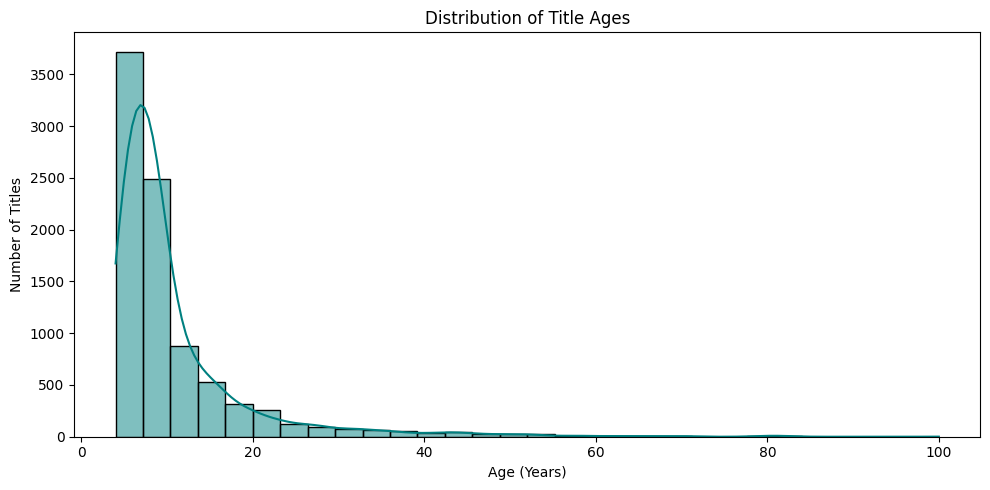

In [39]:
current_year = 2025  # Or use datetime.now().year if you want dynamic

# Calculate age of titles
df['title_age'] = current_year - df['release_year']

# Average age
average_age = df['title_age'].mean()
print(f"Average age of titles: {average_age:.2f} years")

# Optional: plot distribution of title ages
plt.figure(figsize=(10,5))
sns.histplot(df['title_age'], bins=30, kde=True, color='teal')
plt.title('Distribution of Title Ages')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()


**Key Insights**
* The majority of Netflix’s content library consists of titles that are between 0 to 20 years old, indicating a focus on relatively recent productions.

* Titles older than 40 years are very few, showing that classic or very old content is scarce on the platform.

* This suggests Netflix prioritizes newer releases, likely to meet current audience preferences and licensing agreements.

### 3. Content Type and Duration

#### i) What is the distribution of movie durations ?

In [40]:
movies_df = df[df['type'] == 'Movie'].copy()
#This creates a new DataFrame movies_df that contains only Movies, excluding TV Shows altogether.

#Then we extract the numeric part from the 'duration' column, which typically contains strings like "90 min".

In [41]:
movies_df['duration_int'] = movies_df['duration'].str.extract(r'(\d+)').astype(float)

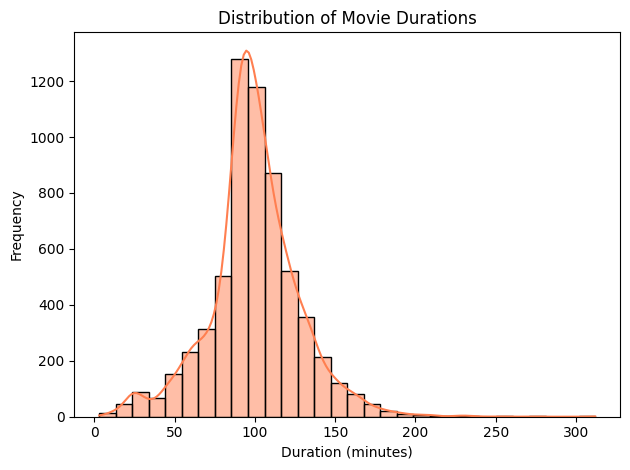

In [42]:
sns.histplot(movies_df["duration_int"], bins=30, kde=True, color='coral')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Key Insights**
* The distribution of movie durations is approximately symmetric, though not perfectly.

* There are no significant outliers, indicating consistent movie lengths.

* The most common duration lies roughly between 100 and 150 minutes.

* This suggests that Netflix tends to offer movies with moderate durations, possibly reflecting user preferences for films that are neither too short nor too long.

#### ii) What is the distribution of TV shows seasons ?

In [43]:
shows_df = df[df['type'] == 'TV Show'].copy()

In [44]:
shows_df['duration_int'] = shows_df['duration'].str.extract(r'(\d+)').astype(float)

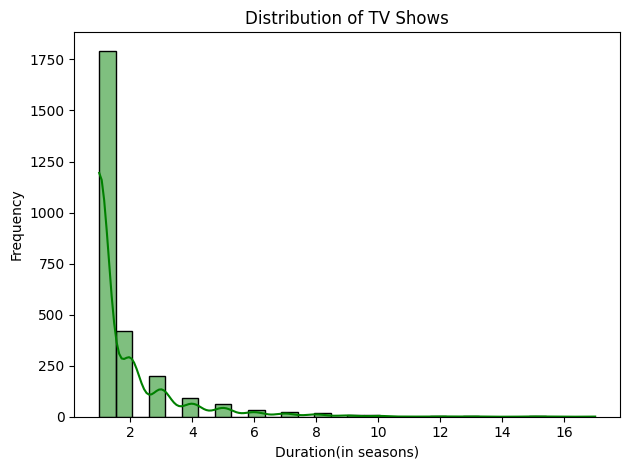

In [45]:
sns.histplot(shows_df['duration_int'],bins=30,kde=True,color='green')
plt.title('Distribution of TV Shows')
plt.xlabel('Duration(in seasons)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Key Insights**
* From the above plot, it's clear that most Netflix TV shows have only 1 or 2 seasons.

* TV shows with more than 2 seasons are relatively rare on the platform.

* This suggests that viewers may prefer shorter series, or Netflix may focus on producing or acquiring limited-series content to match viewing preferences.

#### iii) Compare duration distributions between movies and TV shows

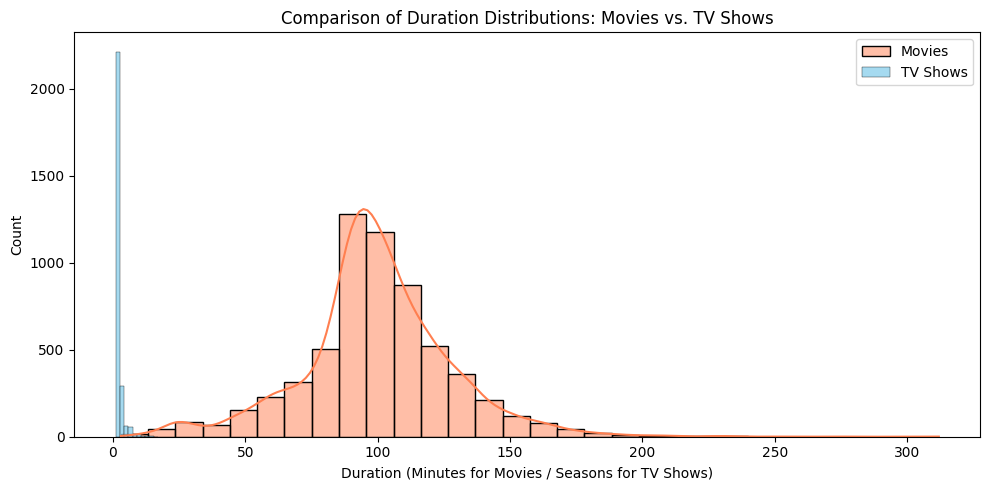

In [46]:
plt.figure(figsize=(10, 5))

# Movies
sns.histplot(movies_df['duration_int'], bins=30, color='coral', kde=True, label='Movies')

# TV Shows
sns.histplot(shows_df['duration_int'], bins=10, color='skyblue', kde=False, label='TV Shows')

plt.title("Comparison of Duration Distributions: Movies vs. TV Shows")
plt.xlabel("Duration (Minutes for Movies / Seasons for TV Shows)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


**Key Insights**
* Movies on Netflix generally have durations clustered around 90 to 120 minutes, indicating a strong preference for moderately long feature films.

* TV Shows are heavily concentrated at 1 or 2 seasons, suggesting a platform trend toward limited series or mini-series formats.

* The distribution for movies is more continuous, while TV shows show a discrete jump (since seasons are counted in whole numbers).

* This contrast highlights that Netflix content strategy caters to quick, bingeable content — be it a short movie or a few-episode series — aligning with user consumption patterns.

### 4. Genre Analysis

#### i) What are the most common genres?

In [47]:
# Split all genre strings and stack them into a single list
all_genres = df['listed_in'].dropna().str.split(',')
flat_genres = all_genres.explode()

# Count the genres
top_genres = flat_genres.value_counts().head(10)

print(top_genres)

# dropna(): Removes missing values.

# str.split(', '): Splits genres like "Dramas, Action" into a list.

# explode(): Turns lists into separate rows, so each genre gets counted.

# value_counts(): Counts each unique genre.

# .head(10): Shows the top 10. '''

listed_in
 International Movies     2624
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     773
 Independent Movies        736
 TV Dramas                 695
 Romantic Movies           613
Name: count, dtype: int64


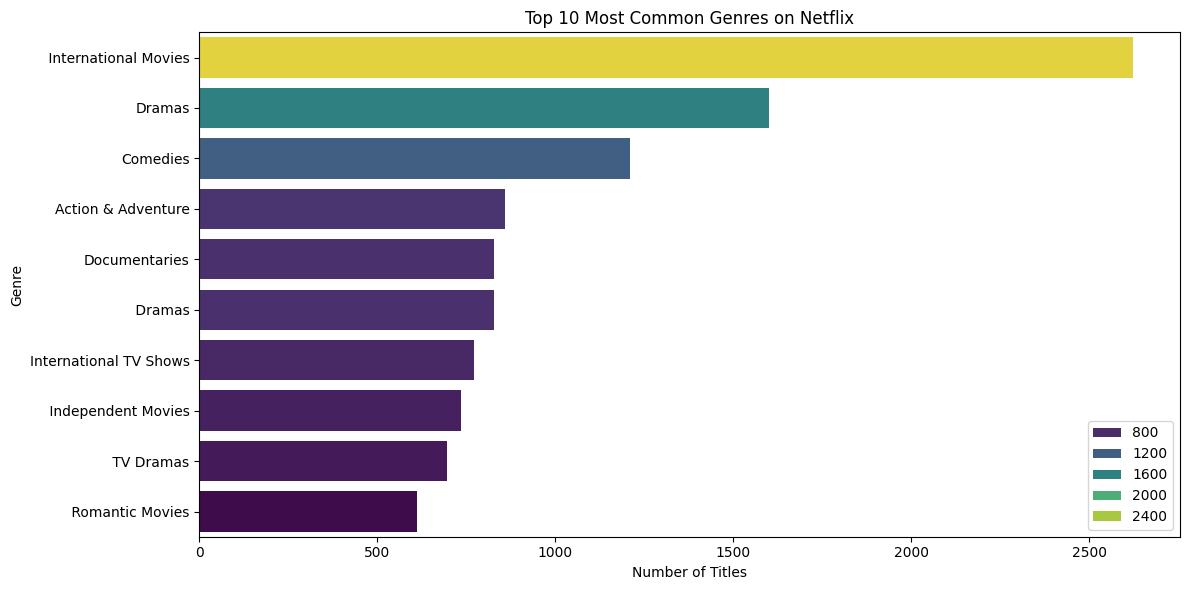

In [48]:
# Plotting the top 10 genres

plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.values,y=top_genres.index,hue=top_genres.values,palette='viridis')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

**Why horizontal bar plot?**
* Genres are labels (text), so it’s easier to read when they're on the y-axis

**Key insights**
* The most popular genre on Netflix is "International Movies".

* Drama, Comedy, and Documentary are some of the common genres many titles belong to.

* Many shows and movies have more than one genre, which shows Netflix has a wide variety of content.

* Some genres appear less often, which means Netflix focuses more on popular categories.

* Knowing which genres are common helps understand what kind of shows and movies Netflix offers.

#### ii) How many titles belong to multiple genres ?

In [49]:
# Count titles where 'listed_in' has a comma (meaning multiple genres)
multiple_genres_count = df['listed_in'].dropna().apply(lambda x: ',' in x).sum()

# Total titles considered
total_titles = df['listed_in'].dropna().shape[0]

print(f"Number of titles with multiple genres: {multiple_genres_count}")
print(f"Total number of titles: {total_titles}")

# Percentage calculation
percentage = (multiple_genres_count / total_titles) * 100
print(f"Percentage of titles with multiple genres: {percentage:.2f}%")

Number of titles with multiple genres: 6780
Total number of titles: 8797
Percentage of titles with multiple genres: 77.07%


#### iii) Which genres tend to have longer durations or more seasons ?

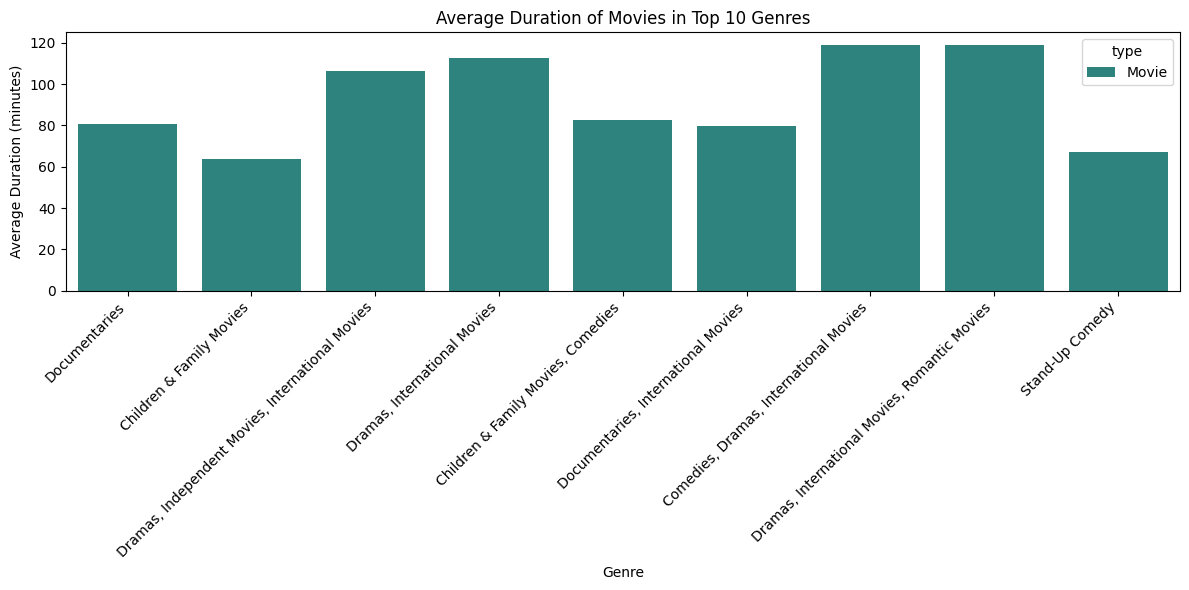

In [62]:
# For movies

# Step 1: Get the top 10 most common genres
top_genres = df['listed_in'].value_counts().head(10).index

# Step 2: Filter data to only include those genres
movies_top_genres = df[(df['type'] == 'Movie') & (df['listed_in'].isin(top_genres))]

# Step 3: Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=movies_top_genres, x='listed_in', y='duration_int', estimator='mean', errorbar=None,hue='type', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Duration of Movies in Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Average Duration (minutes)')
plt.tight_layout()
plt.show()


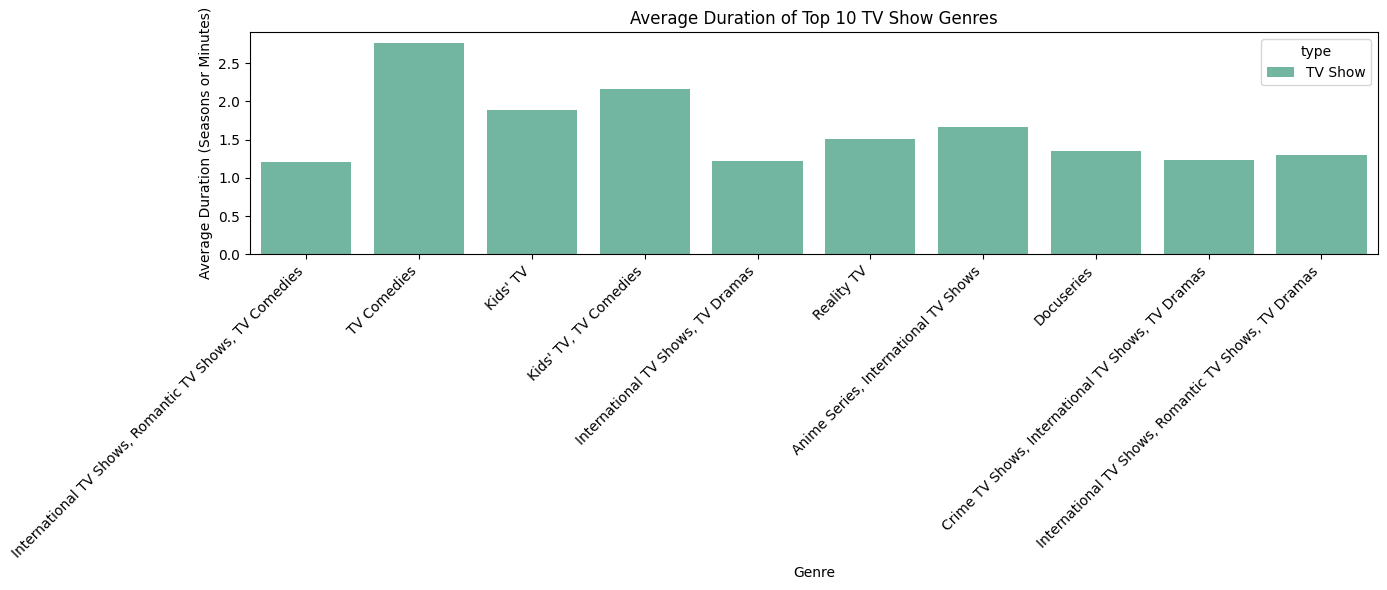

In [65]:
# Step 1: Filter for TV Shows only
tv_shows = df[df['type'] == 'TV Show']

# Step 2: Find top 10 genres for TV Shows
top_genres_tv = tv_shows['listed_in'].value_counts().head(10).index

# Step 3: Filter TV shows to only those top 10 genres
tv_top_genres = tv_shows[tv_shows['listed_in'].isin(top_genres_tv)]

# Step 4: Plot average duration by genre for TV Shows
plt.figure(figsize=(14,6))
sns.barplot(
    data=tv_top_genres,
    x='listed_in',
    y='duration_int',
    estimator='mean',
    errorbar=None, 
    hue = 'type',
    palette='Set2'
)

plt.xticks(rotation=45, ha='right')
plt.title('Average Duration of Top 10 TV Show Genres')
plt.xlabel('Genre')
plt.ylabel('Average Duration (Seasons or Minutes)')
plt.tight_layout()
plt.show()

In [ ]:
**Key Insights**


### 5. Ratings and Audience